## 单应性变换

[[ 1.64013599e+00  3.54707552e-01 -1.11540426e+03]
 [-1.15930422e-01  1.37062034e+00  1.08589460e+02]
 [ 1.27264135e-04  1.57886005e-05  1.00000000e+00]]


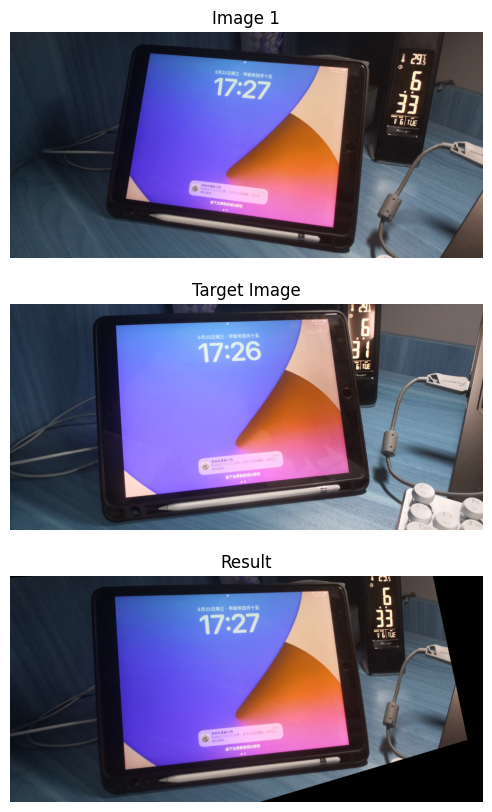

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读入
image1 = cv2.imread("./image/c.jpg")
image2 = cv2.imread("./image/a.jpg")

# 使用SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# FLANN匹配器
index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
rawMatches = flann.knnMatch(descriptors1, descriptors2, k=2)

# 当最近距离跟次近距离的比值小于ratio值时，保留此匹配对
matches = []
for m, n in rawMatches:
    if m.distance < 0.7 * n.distance:
        matches.append(m)

if len(matches) <= 8:
    print("fail")
    exit()

# 获取匹配点的坐标
pts1 = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
pts2 = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

# 计算Homography矩阵
H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
print(H)

# 对第一幅图像执行变换
height, width, _ = image2.shape
aligned_image = cv2.warpPerspective(image1, H, (width, height))

# imshow
_, axs = plt.subplots(3, 1, figsize=(30, 10))
axs[0].imshow(image1)
axs[0].set_title('Image 1')
axs[0].axis('off')
axs[1].imshow(image2)
axs[1].set_title('Target Image')
axs[1].axis('off')
axs[2].imshow(aligned_image)
axs[2].set_title('Result')
axs[2].axis('off')
plt.show()


cv2.imwrite("./image/res.jpg", aligned_image)